In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('gym_churn_us.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
df.shape 

(4000, 14)

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
df['Churn'].value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

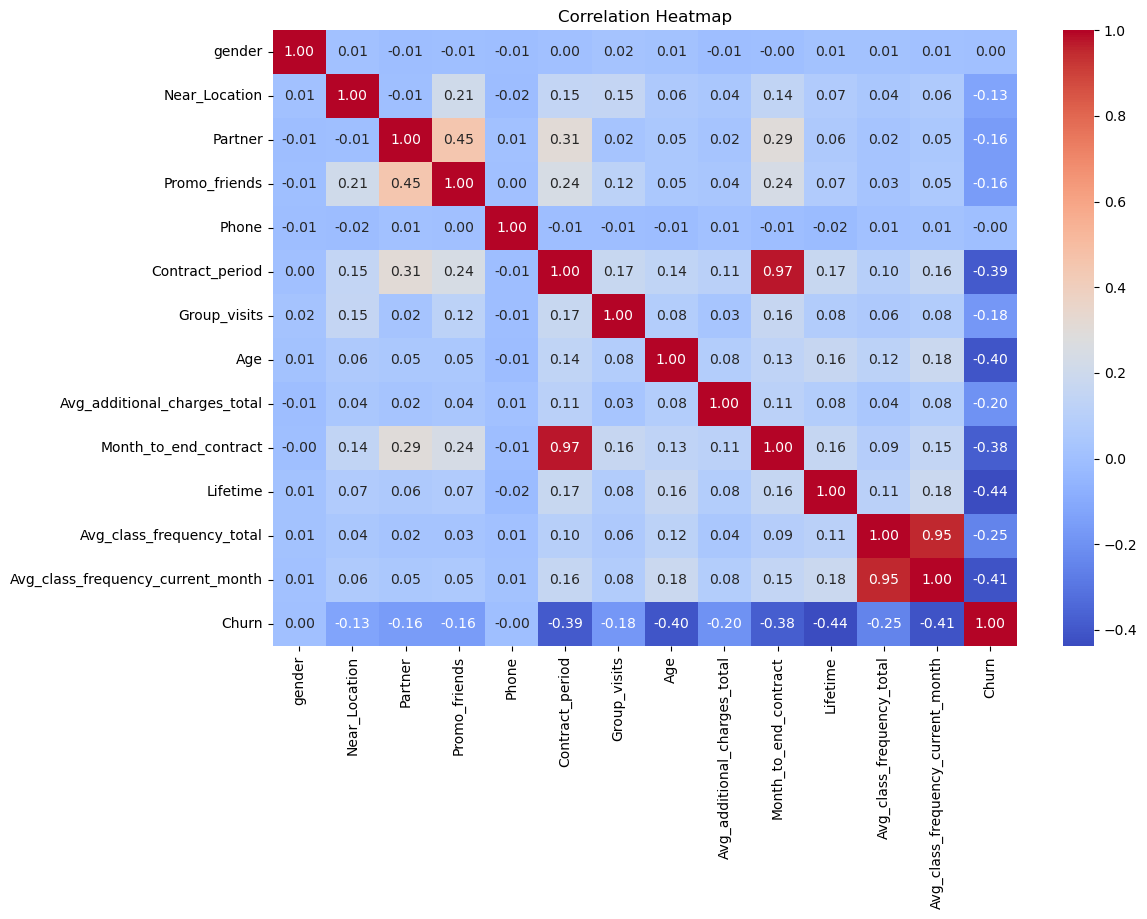

In [9]:
# Korelasyon matrisi
corr = df.corr()

# Grafik boyutu
plt.figure(figsize=(12, 8))

# Heatmap çizimi
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       598
           1       0.87      0.80      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.88      0.89       800
weighted avg       0.92      0.92      0.92       800


=== CONFUSION MATRIX ===
[[573  25]
 [ 40 162]]


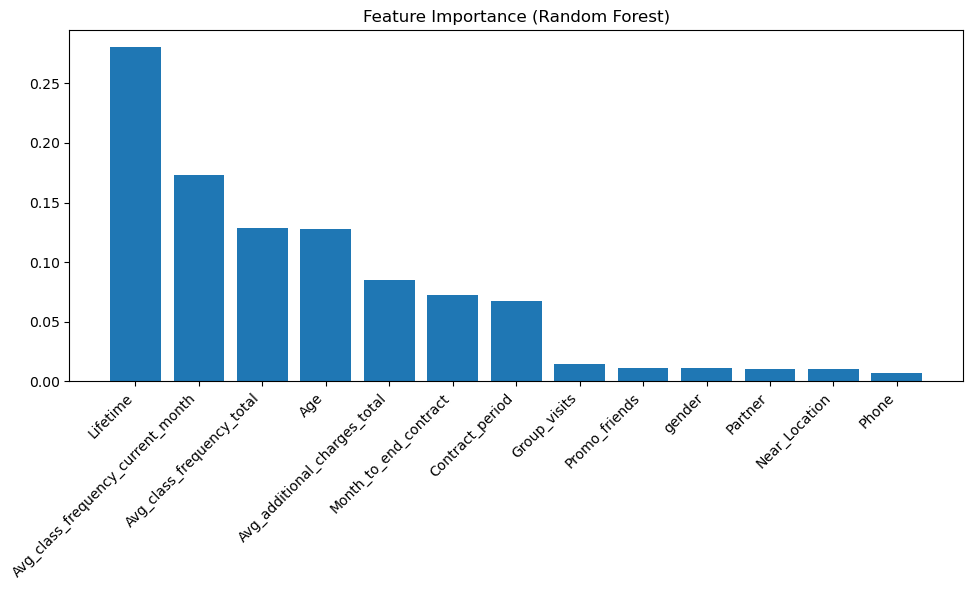

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=1000,    # ağaç sayısı
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features[indices], importances[indices])
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


In [12]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
scale_pos_weight


np.float64(2.7252619324796274)

In [13]:
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [14]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("=== XGBOOST CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_xgb))

print("=== XGBOOST CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred_xgb))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))


=== XGBOOST CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       598
           1       0.87      0.88      0.87       202

    accuracy                           0.94       800
   macro avg       0.91      0.92      0.91       800
weighted avg       0.94      0.94      0.94       800

=== XGBOOST CONFUSION MATRIX ===
[[571  27]
 [ 25 177]]
ROC-AUC: 0.9742375575350177


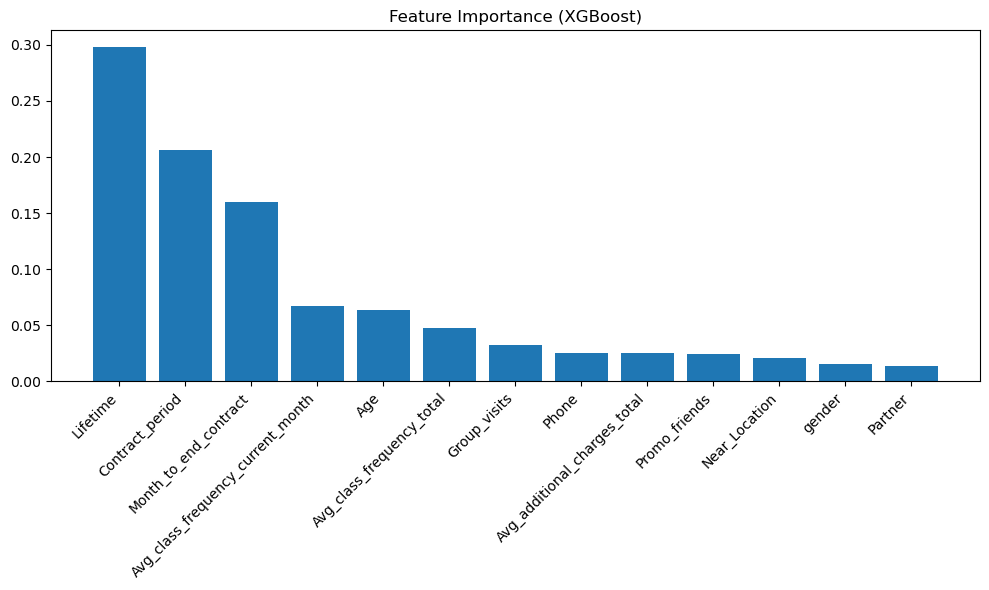

In [15]:
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(X.columns[indices_xgb], importances_xgb[indices_xgb])
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


In [16]:
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [0.92, 0.93],
    "Precision (Churn=1)": [0.87, 0.86],
    "Recall (Churn=1)": [0.80, 0.86],
    "F1-Score (Churn=1)": [0.83, 0.86],
    "ROC-AUC": [0.95, 0.97]
})

comparison_df


,Model,Accuracy,Precision (Churn=1),Recall (Churn=1),F1-Score (Churn=1),ROC-AUC
0,Random Forest,0.92,0.87,0.80,0.83,0.95
1,XGBoost,0.93,0.86,0.86,0.86,0.97


In [17]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]


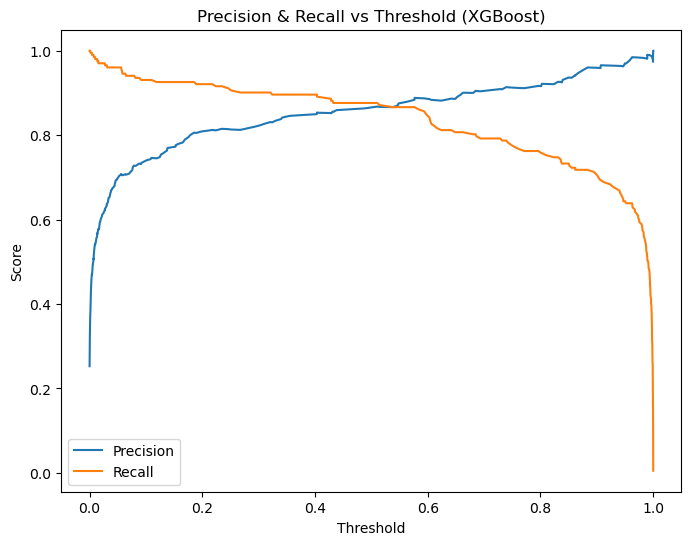

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold (XGBoost)")
plt.legend()
plt.show()


In [19]:
import pandas as pd

threshold_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

threshold_df[threshold_df["recall"] >= 0.90].head(10)


,threshold,precision,recall
0,0.000025,0.252500,1.0
1,0.000036,0.252816,1.0
2,0.000043,0.253133,1.0
3,0.000044,0.253450,1.0
4,0.000047,0.253769,1.0
5,0.000047,0.254088,1.0
6,0.000054,0.254408,1.0
7,0.000054,0.254729,1.0
8,0.000056,0.255051,1.0
9,0.000058,0.255373,1.0


In [20]:
best_threshold = 0.35


In [21]:
y_pred_opt = (y_proba >= best_threshold).astype(int)



In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print("=== THRESHOLD OPTIMIZED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_opt))

print("=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred_opt))


=== THRESHOLD OPTIMIZED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       598
           1       0.85      0.90      0.87       202

    accuracy                           0.93       800
   macro avg       0.90      0.92      0.91       800
weighted avg       0.93      0.93      0.93       800

=== CONFUSION MATRIX ===
[[565  33]
 [ 21 181]]


In [23]:
import shap

# JS görselleştirme (Jupyter için)
shap.initjs()

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


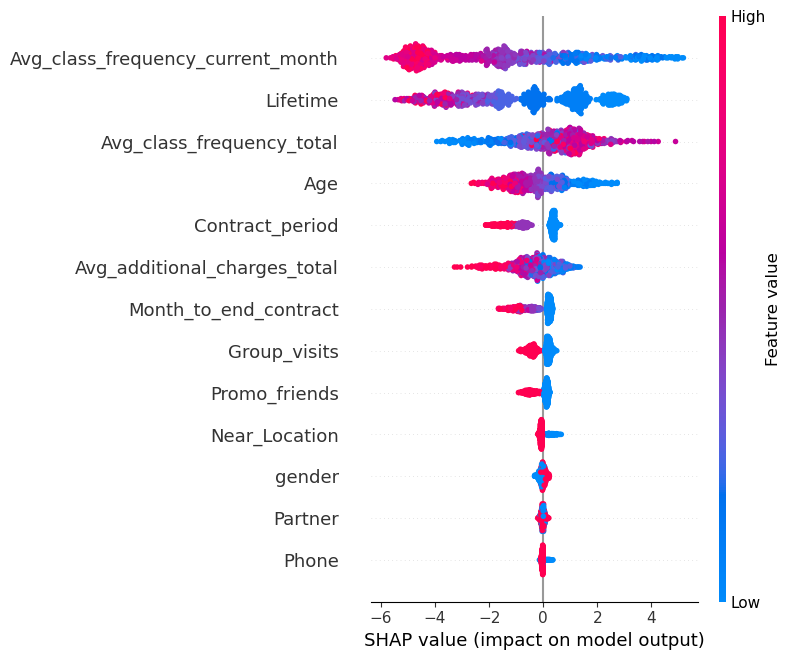

In [24]:
shap.summary_plot(shap_values, X_test)


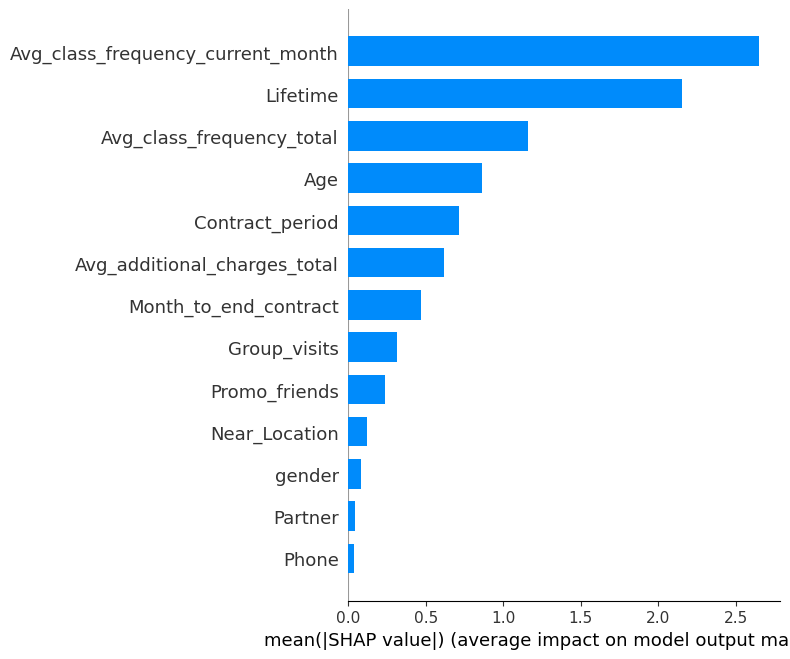

In [25]:
shap.summary_plot(shap_values, X_test, plot_type="bar")



In [26]:
i = 10  # test setinden herhangi bir index


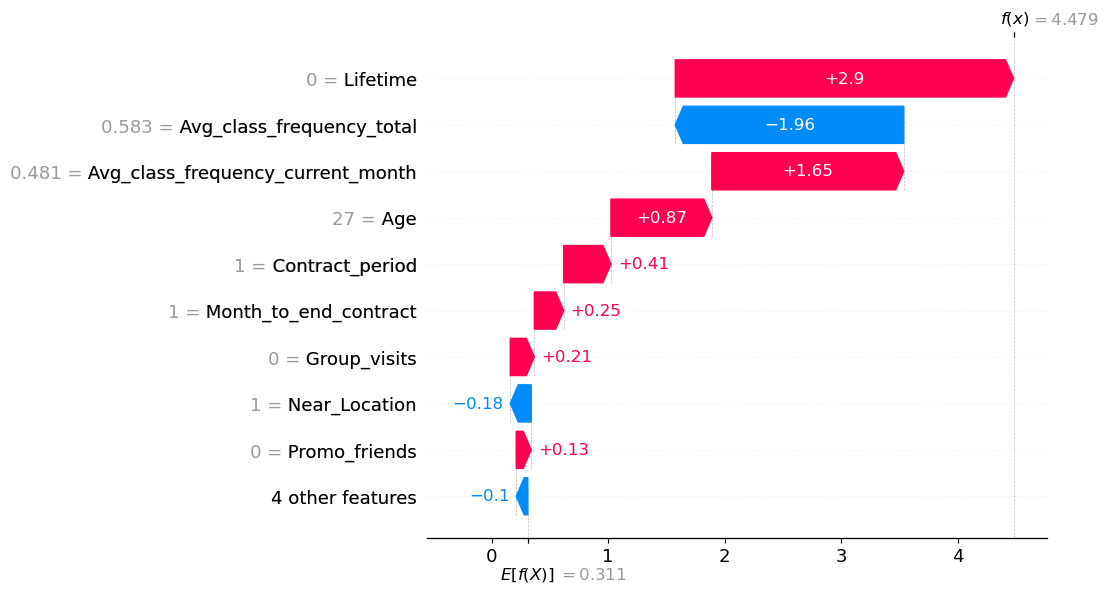

In [27]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[i],
        base_values=explainer.expected_value,
        data=X_test.iloc[i],
        feature_names=X_test.columns
    )
)


In [28]:
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test.iloc[i]
)


In [29]:
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# -----------------------------
# Ortak metrik fonksiyonu
# -----------------------------
def get_metrics(y_true, y_pred, y_proba):
    report = classification_report(y_true, y_pred, output_dict=True)
    recall = report["1"]["recall"]
    precision = report["1"]["precision"]
    f1 = report["1"]["f1-score"]
    auc = roc_auc_score(y_true, y_proba)
    return recall, precision, f1, auc


# -----------------------------
# 1️⃣ Random Forest
# -----------------------------
rf_pred = model.predict(X_test)
rf_proba = model.predict_proba(X_test)[:, 1]

rf_recall, rf_precision, rf_f1, rf_auc = get_metrics(
    y_test, rf_pred, rf_proba
)


# -----------------------------
# 2️⃣ XGBoost (Default threshold = 0.5)
# -----------------------------
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = (xgb_proba >= 0.5).astype(int)

xgb_recall, xgb_precision, xgb_f1, xgb_auc = get_metrics(
    y_test, xgb_pred, xgb_proba
)


# -----------------------------
# 3️⃣ XGBoost (Threshold Optimized = 0.35)
# -----------------------------
best_threshold = 0.35
xgb_opt_pred = (xgb_proba >= best_threshold).astype(int)

xgb_opt_recall, xgb_opt_precision, xgb_opt_f1, xgb_opt_auc = get_metrics(
    y_test, xgb_opt_pred, xgb_proba
)


# -----------------------------
# 📊 Karşılaştırma Tablosu
# -----------------------------
comparison_df = pd.DataFrame({
    "Model": [
        "Random Forest",
        "XGBoost (Default)",
        "XGBoost (Threshold Optimized)"
    ],
    "Recall (Churn=1)": [
        rf_recall,
        xgb_recall,
        xgb_opt_recall
    ],
    "Precision (Churn=1)": [
        rf_precision,
        xgb_precision,
        xgb_opt_precision
    ],
    "F1-score (Churn=1)": [
        rf_f1,
        xgb_f1,
        xgb_opt_f1
    ],
    "ROC-AUC": [
        rf_auc,
        xgb_auc,
        xgb_opt_auc
    ]
})

comparison_df


,Model,Recall (Churn=1),Precision (Churn=1),F1-score (Churn=1),ROC-AUC
0,Random Forest,0.801980,0.866310,0.832905,0.961576
1,XGBoost (Default),0.876238,0.867647,0.871921,0.974238
2,XGBoost (Threshold Optimized),0.896040,0.845794,0.870192,0.974238


In [30]:
import pickle

feature_columns = X_train.columns.tolist()

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)